# 2-1 初探神經網路

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

### 程式 2.1 在 Keras 中載入 MNIST 資料集

In [0]:
from keras.datasets import mnist  #從 keras 的 datasets 匯入 mnist 資料集

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#用 mnist.load_data() 取得 mnist 資料集, 並存 (打包) 成 tuple (Python 語法是：只要有逗號, 沒有小括號也會被看成是 tuple, 所以 (train_images, train_labels), (test_images, test_labels) 等同於 ((train_images, train_labels), (test_images, test_labels)), 此 tuple 又內含兩個 tuple

### 程式 2.2 了解訓練資料

In [3]:
train_images.shape  #train_image 為 NumPy 的 ndarray 物件
                    #train_image 的 shape 屬性為 3 軸, 60000 維 x28 維 x28 維

(60000, 28, 28)

In [4]:
len(train_labels)
                    #標籤也有 60000 個

60000

In [5]:
train_labels
                    #標籤是 0-9 之間的數字, 資料型別為 uint8

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 程式 2.3 了解測試資料

In [6]:
test_images.shape  
                    #shape 為 3 軸, 10000 維 x28 維 x28 維

(10000, 28, 28)

In [7]:
len(test_labels)
                    #標籤也有 10000 個

10000

In [8]:
test_labels
                    #標籤是 0-9 之間的數字, 資料型別為 uint8

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### 程式 2.4 神經網路架構

In [9]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


### 程式 2.5 編譯步驟

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### 程式 2.6 準備圖片資料

In [0]:
train_images = train_images.reshape((60000, 28 * 28))  #reshape 是 NumPy 陣列的 method
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### 程式 2.7 準備標籤

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 程式 2.8 檢驗神經網路模型

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.2572 - acc: 0.9259
Epoch 2/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.1042 - acc: 0.9688
Epoch 3/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.0687 - acc: 0.9791
Epoch 4/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0499 - acc: 0.9854
Epoch 5/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.0377 - acc: 0.9887


### 程式 2.9 評估測試資料的表現

In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 55us/step
test_acc: 0.98


# 2-2 神經網路的資料表示法

## 2-2-1 純量 (0D 張量)

In [15]:
import numpy as np
x = np.array(12)      #用 12 這個數值去建一個張量
x                     #看看張量的內容
                      #原來 Numpy 的 array 就是 tensor

array(12)

In [16]:
x.ndim                #看看 ndim 屬性 (就是階數)
                      #ndim 為 0, 是 0 階張量 (純量)

0

## 2-2-2 向量 (1D 張量)

In [17]:
x = np.array([12, 3, 6, 14, 7])   #用 array() 建一個 5 維的 1 D 張量
x                                 #看看張量的內容
                                  #是一個含有 4 個元素 (4 維) 的 1D 張量

array([12,  3,  6, 14,  7])

In [18]:
x.ndim                            #看看 ndim 屬性 (就是階數)
                                  #ndim 為 1, 是 1 階張量 (向量)

1

## 2-2-3 矩陣 (2D 張量)

In [0]:
x = np.array([[5, 78, 2, 34, 0],    #用 array() 建一個 3x5 (維) 的 2D 張量
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [20]:
x.ndim                              #看看 ndim 屬性 (就是階數)

2

## 2-2-4 3D 張量和高階張量

In [0]:
 x = np.array([[[5, 78, 2, 34, 0],         #用 array() 建一個 3x3x5 (維) 的 3D 張量
                [6, 79, 3, 35, 1], 
                [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]]])

In [22]:
x.ndim                                     #看看 ndim 屬性 (就是階數)
                                           #ndim 為 3, 是 3 階張量

3

## 2-2-5 關鍵屬性

In [0]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [24]:
print(train_images.ndim)
                            #ndim 為 3, 有 3 個軸

3


In [25]:
print(train_images.shape)
                            #shape 為 60000x28x28 維的 3D 張量 (有 3 個元素)

(60000, 28, 28)


In [26]:
print(train_images.dtype)
                            #元素的資料型別為 0~255 的整數

uint8


### 程式 2.10 顯示第 4 個數字的圖像

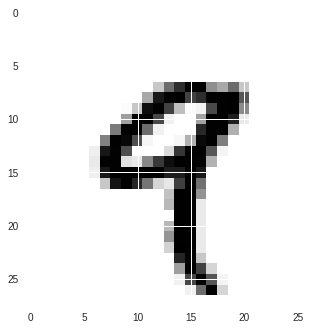

In [27]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## 2-2-6 在 Numpy 中調整張量

In [28]:
my_slice = train_images[10:100]  #關於切片可參考 "Python 技術者們．實踐！一書中的 2-1 節的使用切片(Slicing) 的詳細說明
print(my_slice.shape)

(90, 28, 28)


In [29]:
my_slice = train_images[10:100, :, :]  #等同於上面的寫法
my_slice.shape

(90, 28, 28)

In [30]:
my_slice = train_images[10:100, 0:28, 0:28]  #同樣等同於上的寫法
my_slice.shape

(90, 28, 28)

In [0]:
my_slice = train_images[:, 14:, 14:]  #這裡的 14: 就等於是 14:28

In [0]:
my_slice = train_images[:, 7:-7, 7:-7]

## 2-2-7 資料批次 (batch) 的概念

In [0]:
batch = train_images[:128]  #把 train_images 切片為 128 個圖像為一批 batch

In [0]:
batch = train_images[128:256]

In [0]:
# 可以修改程式的 n 值, 找到你想測試的批次量
#batch = train_images[128 * n:128 * (n + 1)]

# 2-3 神經網路的工具：張量運算

## 2-3-1 元素間的運算

In [0]:
def naive_relu(x):
    assert len(x.shape) == 2   #x 是一個 2D Numpy 張量

    x = x.copy()  #避免覆寫到輸入張量 mp
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [0]:
def naive_add(x, y):
    assert len(x.shape) == 2  #x 與 y 是都是 2D Numpy 張量
    assert x.shape == y.shape
    
    x = x.copy()  #避免覆寫到輸入張量 mpy
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [0]:
#import numpy as np

#z = x + y  #元素間的相加運算

#z = np.maximum(z, 0.)  #元素間的 relu 運算

## 2-3-2 張量擴張 (Broadcasting)

In [0]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2  #x 是一個 2D Numpy 張量
    assert len(y.shape) == 1  #y 是一個 Numpy 向量
    assert x.shape[1] == y.shape[0]

    x = x.copy()  #避免覆寫到輸入張量
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [40]:
import numpy as np

x = np.random.random((64, 3, 32, 10))  #x 是一個隨機張量, shape 為 (64, 3, 32, 10)
y = np.random.random((32, 10))  #是一個隨機張量, shape 為 (32, 10)

z = np.maximum(x, y)  #輸出結果 z 的 shape 就如同 x 一樣是 (64, 3, 32, 10),意思是 y 已先被擴張了
z.shape

(64, 3, 32, 10)

## 2-3-3 張量點積 (dot) 運算

In [0]:
import numpy as np

#z = np.dot(x, y)  
# x 向量與 y 向量間的點積運算

In [0]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1  # x 與 y 是 Numpy 向量
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]  # 就是x[0]*y[0] + x[1]*y[1] + x[2]*y[2] + x[3]*y[3]….
    return z

In [0]:
import numpy as np

def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]

    z = np.zeros(x.shape[0])        # z為與 x 第0軸形狀一樣, 數值為 0 的向量
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]               # z 的各元素值已被內層 for loop 填入了
    return z

In [0]:
def naive_matrix_vector_dot(x, y):      #這是一個矩陣-向量的 dot
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)        #內部包著一個向量-向量的 dot
    return z

In [0]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]    # x 與 y 是 Numpy 矩陣, x 的第 1 維的數量必須與 y 第 0 維的數量相等

    z = np.zeros((x.shape[0], y.shape[1]))       #這裡會回數值為 0 的矩陣
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):    #重複計算 x 各列數值與 y 各行數值
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

## 2-3-4 張量重塑

In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
train_images = train_images.reshape((60000, 28 * 28))

In [48]:
x = np.array([[0., 1.], #產生一個 3x2 的張量
              [2., 3.],
              [4., 5.]])
print(x.shape)

(3, 2)


In [49]:
x = x.reshape((6, 1))  #reshape 成 6x1
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [50]:
x = x.reshape((2, 3))  #再 reshape 成 2x3
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [51]:
x = np.zeros((300, 20))  #創建一個數值全為 0, 形狀為 (300, 20) 的矩陣
x = np.transpose(x)
print(x.shape)

(20, 300)


# 2-5 回顧我們的第一個例子

In [0]:
import keras
from keras import models
from keras import layers
keras.__version__

from keras.datasets import mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:
#network.fit(train_images, train_labels, epochs=5, batch_size=128)